In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import os
import matplotlib.pyplot as plt

url = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"

df = pd.read_json(url)

print (df.head())


                  name  gt_corners  rb_corners       mean        max  \
1342    Master Bedroom           4           4   1.739907   4.703960   
1343  Master Bedroom 2           4           4   0.530908   0.786997   
1344          Zimmer I           4           4   0.880569   1.221873   
1345  Hallway Bathroom           6           6  24.923452  64.266820   
1346         Bedroom 4           4           4   0.387328   0.762659   

           min  floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  \
1342  0.166677    0.487452   1.074033   0.166677      2.992362     4.703960   
1343  0.101973    0.323746   0.614770   0.101973      0.738071     0.786997   
1344  0.362600    0.823587   1.120810   0.362600      0.937550     1.221873   
1345  0.064699   24.857904  64.123596   0.064699     24.988999    64.266820   
1346  0.166426    0.349720   0.730373   0.205136      0.424936     0.762659   

      ceiling_min  
1342     1.216172  
1343     0.670290  
1344     0.490739  
1345     0.0

In [20]:

# 1. Mean Absolute Error (MAE) for the number of corners
mae_corners = mean_absolute_error(df['gt_corners'], df['rb_corners'])

# 2. Root Mean Squared Error (RMSE) for the number of corners
rmse_corners = np.sqrt(mean_squared_error(df['gt_corners'], df['rb_corners']))

# 3. Mean Absolute Deviation (MAD) for deviation values (mean, max, min) in degrees
mad_mean = np.mean(np.abs(df['mean'] - df['gt_corners']))
mad_max = np.mean(np.abs(df['max'] - df['gt_corners']))
mad_min = np.mean(np.abs(df['min'] - df['gt_corners']))

# 4. Root Mean Squared Deviation (RMSD) for deviation values
rmsd_mean = np.sqrt(np.mean((df['mean'] - df['gt_corners'])**2))
rmsd_max = np.sqrt(np.mean((df['max'] - df['gt_corners'])**2))
rmsd_min = np.sqrt(np.mean((df['min'] - df['gt_corners'])**2))

# 5. Room-wise Statistics (You can print these values for each room)
room_stats = df[['name', 'gt_corners', 'rb_corners', 'mean', 'max', 'min']].copy()
room_stats['MAE_corners'] = np.abs(df['gt_corners'] - df['rb_corners'])
room_stats['RMSE_corners'] = (df['gt_corners'] - df['rb_corners'])**2
room_stats['MAD_mean'] = np.abs(df['mean'] - df['gt_corners'])
room_stats['MAD_max'] = np.abs(df['max'] - df['gt_corners'])
room_stats['MAD_min'] = np.abs(df['min'] - df['gt_corners'])
room_stats['RMSD_mean'] = (df['mean'] - df['gt_corners'])**2
room_stats['RMSD_max'] = (df['max'] - df['gt_corners'])**2
room_stats['RMSD_min'] = (df['min'] - df['gt_corners'])**2

# 6. Overall Model Performance
overall_mae_corners = room_stats['MAE_corners'].mean()
overall_rmse_corners = np.sqrt(room_stats['RMSE_corners'].mean())
overall_mad_mean = room_stats['MAD_mean'].mean()
overall_mad_max = room_stats['MAD_max'].mean()
overall_mad_min = room_stats['MAD_min'].mean()
overall_rmsd_mean = np.sqrt(room_stats['RMSD_mean'].mean())
overall_rmsd_max = np.sqrt(room_stats['RMSD_max'].mean())
overall_rmsd_min = np.sqrt(room_stats['RMSD_min'].mean())

# 7. Percentage Accuracy for the number of corners
percentage_accuracy = (df['gt_corners'] == df['rb_corners']).mean() * 100

# 8. Correlation Coefficient between ground truth and predicted values
correlation_coefficient, _ = pearsonr(df['gt_corners'], df['rb_corners'])

# Print the results
print(f"MAE for the number of corners: {mae_corners:.2f}")
print(f"RMSE for the number of corners: {rmse_corners:.2f}")
print(f"MAD for Mean Deviation: {mad_mean:.2f}")
print(f"MAD for Max Deviation: {mad_max:.2f}")
print(f"MAD for Min Deviation: {mad_min:.2f}")
print(f"RMSD for Mean Deviation: {rmsd_mean:.2f}")
print(f"RMSD for Max Deviation: {rmsd_max:.2f}")
print(f"RMSD for Min Deviation: {rmsd_min:.2f}")
print("\nRoom-wise Statistics:")
print(room_stats)
print("\nOverall Model Performance:")
print(f"Overall MAE for the number of corners: {overall_mae_corners:.2f}")
print(f"Overall RMSE for the number of corners: {overall_rmse_corners:.2f}")
print(f"Overall MAD for Mean Deviation: {overall_mad_mean:.2f}")
print(f"Overall MAD for Max Deviation: {overall_mad_max:.2f}")
print(f"Overall MAD for Min Deviation: {overall_mad_min:.2f}")
print(f"Overall RMSD for Mean Deviation: {overall_rmsd_mean:.2f}")
print(f"Overall RMSD for Max Deviation: {overall_rmsd_max:.2f}")
print(f"Overall RMSD for Min Deviation: {overall_rmsd_min:.2f}")
print(f"Percentage Accuracy for the number of corners: {percentage_accuracy:.2f}%")
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


MAE for the number of corners: 0.00
RMSE for the number of corners: 0.00
MAD for Mean Deviation: 12.25
MAD for Max Deviation: 23.77
MAD for Min Deviation: 5.39
RMSD for Mean Deviation: 23.38
RMSD for Max Deviation: 47.56
RMSD for Min Deviation: 9.39

Room-wise Statistics:
                  name  gt_corners  rb_corners       mean        max  \
0         Schlafzimmer           4           4   3.956313   8.562939   
1                Küche           4           4  23.019122  52.605437   
2             Bathroom           4           4   1.013833   1.950322   
3         Lounge/Diner           8           8   3.832620  18.236935   
4           Essbereich           4           4   8.017758  15.642853   
...                ...         ...         ...        ...        ...   
1342    Master Bedroom           4           4   1.739907   4.703960   
1343  Master Bedroom 2           4           4   0.530908   0.786997   
1344          Zimmer I           4           4   0.880569   1.221873   
1345  H

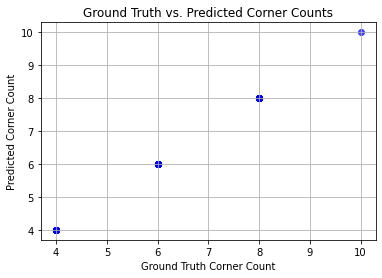

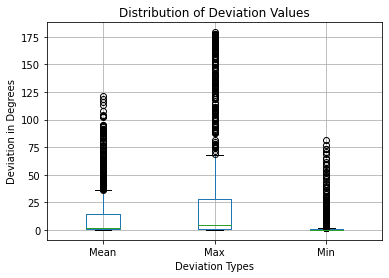

In [27]:


class PlotDrawer:
    def __init__(self, data_df):
        self.data_df = data_df
        self.plot_folder = "plots"
        os.makedirs(self.plot_folder, exist_ok=True)


    def draw_scatter_plot(self, x_data, y_data, filename, x_label, y_label, title):
        plt.scatter(x_data, y_data, c='blue', alpha=0.7)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.grid(True)
        plt.show()
        self._save_plot(filename)

    def draw_box_plot(self, data, filename, x_label, y_label, title):
        data.boxplot()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.xticks([1, 2, 3], ['Mean', 'Max', 'Min'])
        plt.show()
        self._save_plot(filename)

    def _save_plot(self, filename):
        plt.tight_layout()
        plt.savefig(f"{self.plot_folder}/{filename}.png")
        plt.close()

plot_drawer = PlotDrawer(df)

# Example usage:
plot_drawer.draw_scatter_plot(df['gt_corners'], df['rb_corners'], "Ground_Truth_vs_Predicted_Corner_Counts", 'Ground Truth Corner Count', 'Predicted Corner Count', 'Ground Truth vs. Predicted Corner Counts')
plot_drawer.draw_box_plot(df[['mean', 'max', 'min']], "Distribution_of_Deviation_Values", 'Deviation Types', 'Deviation in Degrees', 'Distribution of Deviation Values')
